In [1]:
import numpy as np
import pandas as pd
import neuroseries as nts


import time
import matplotlib.pyplot as plt
%matplotlib qt

import seaborn as sns 

import basefunction.assembly as assembly

import bk.load
import bk.plot
import basefunction.anass_load as at

In [2]:
%matplotlib inline

In [3]:
bk.load.current_session_linux()
neurons,metadata = bk.load.spikes()
structures = ['BLA','Hpc','CeCM']
# neurons = {'all':neurons}
# metadata = {'all':metadata}

# for s in structures:
#     neurons.update({s:neurons['all'][metadata['all']['Region'] == s]})
#     metadata.update({s:metadata['all'][metadata['all']['Region'] == s]})

Rat : 8 on day : 6
Working with session Rat08-20130713 @ /home/billel/Data/GG-Dataset/Rat08/Rat08-20130713
Data already saved in Numpy format, loading them from here:
Rat08-20130713-neurons.npy
Rat08-20130713-metadata.npy


In [5]:
t,actmat = bk.compute.binSpikes(neurons[metadata.Region == 'Hpc'])
actmat = nts.TsdFrame(t,actmat.T,time_units='s')
states = bk.load.states()
run_intervals = bk.load.run_intervals()
actmat_run = actmat.restrict(run_intervals)

In [7]:
# using circular shuffling for computing null distribution 
                    # (MUST USE IT IF YOU HAVE STRONG AUTOCORRELATIONS)

nshu = 1000 # defines number of controls to run 
#                     (i.e., number of elements in null hypothesis distribution)

percentile = 99.5 # defines which percentile of control distribution
#                                        will be used as significance threshold


t0 = time.time()
patterns, significance, zactmat = assembly.runPatterns(actmat_run.values.T,
                                                       nullhyp='mp',
                                                       nshu = nshu,
                                                       percentile = percentile)

tf = np.round(1000*(time.time()-t0))/1000

for pi,pattern in enumerate(patterns):
    if np.sum(pattern) < 0: patterns[pi] = -pattern

In [8]:
colors = np.where(metadata['Region'] == 'BLA','lightgreen','grey')
colors[metadata['Region'] == 'Hpc'] = 'lightblue'

In [48]:
1/np.sqrt(252)

0.0629940788348712

In [56]:
markerline

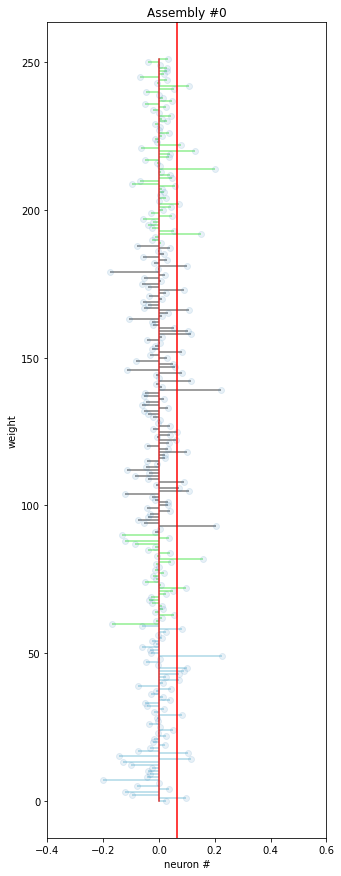

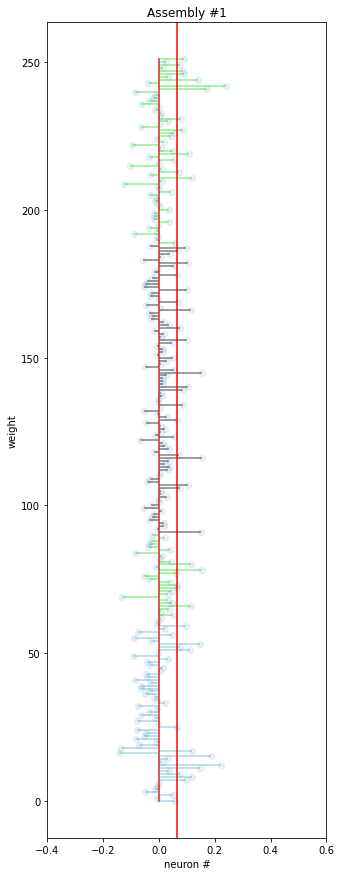

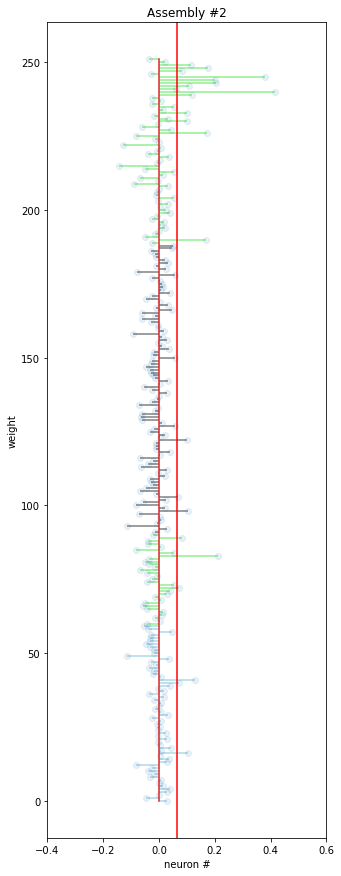

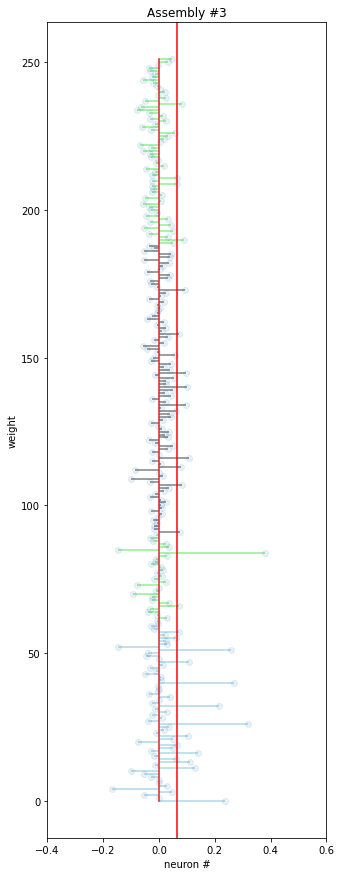

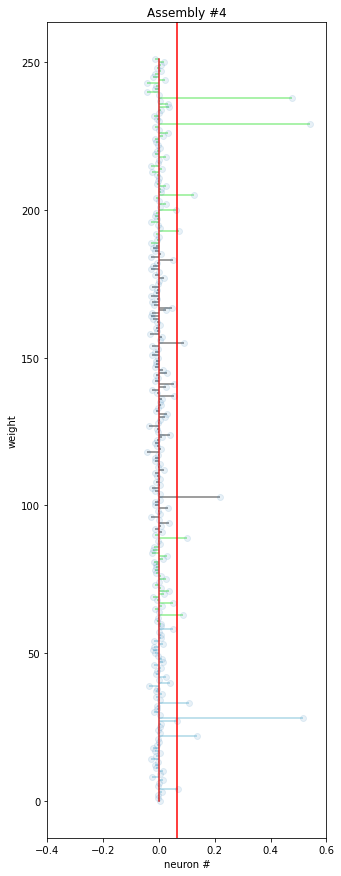

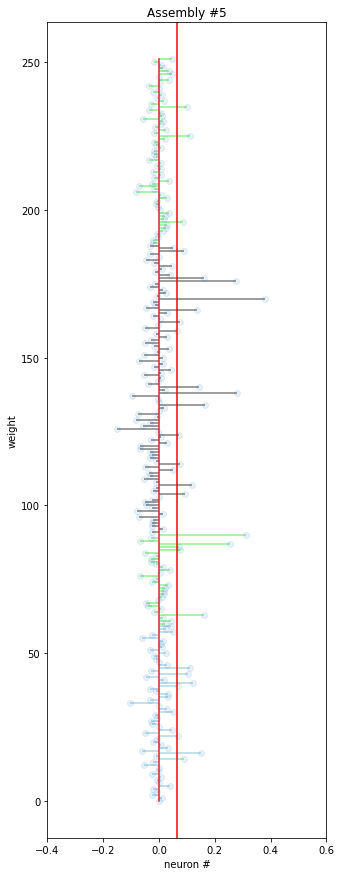

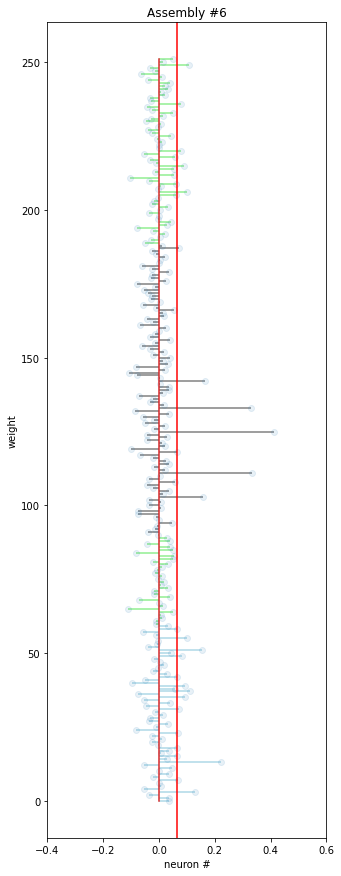

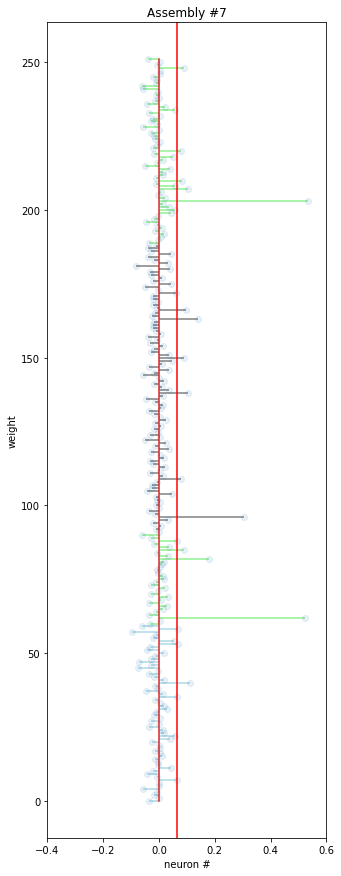

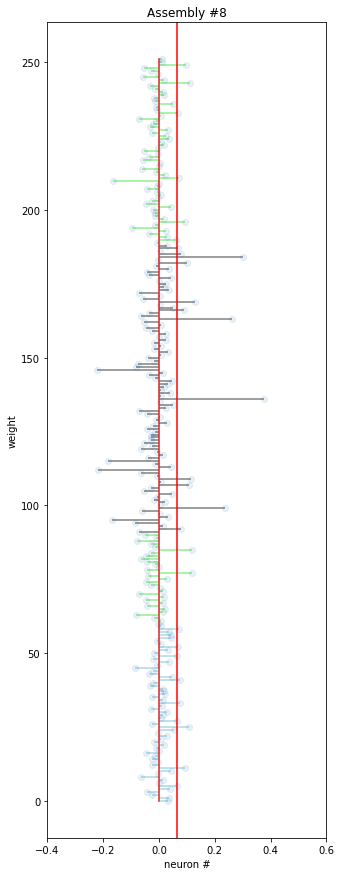

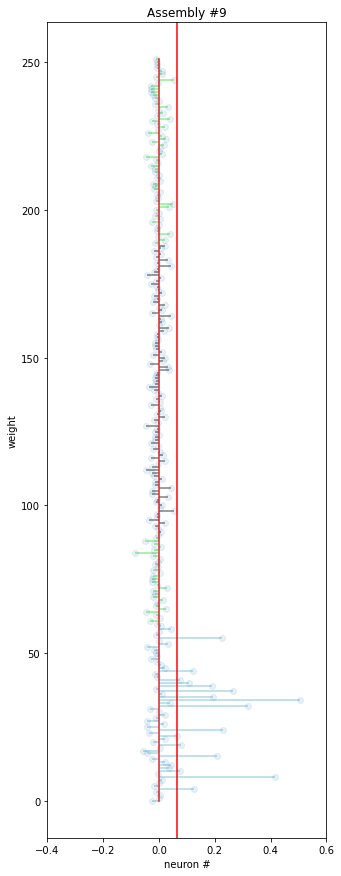

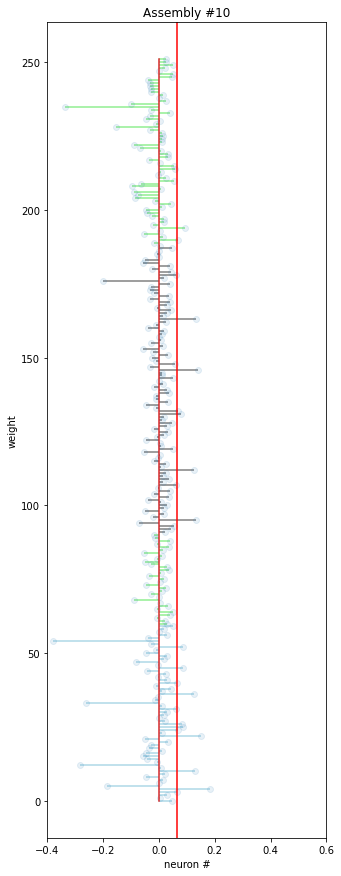

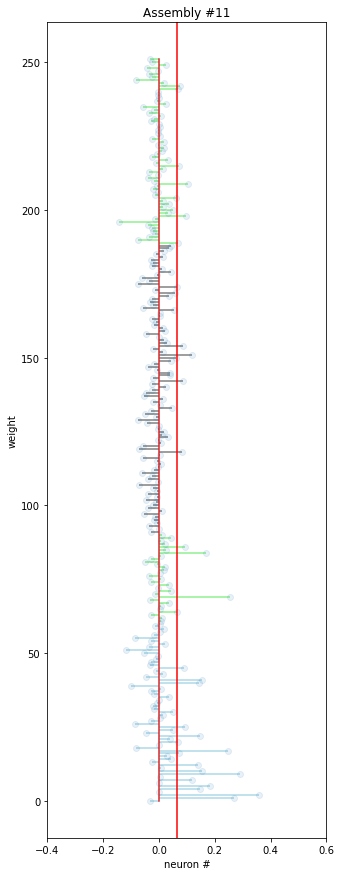

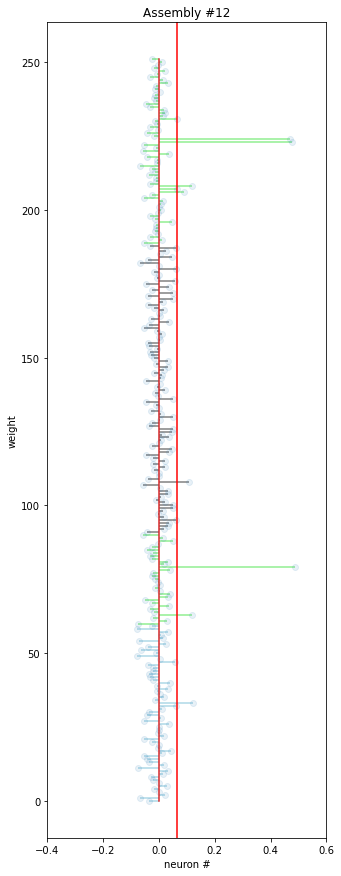

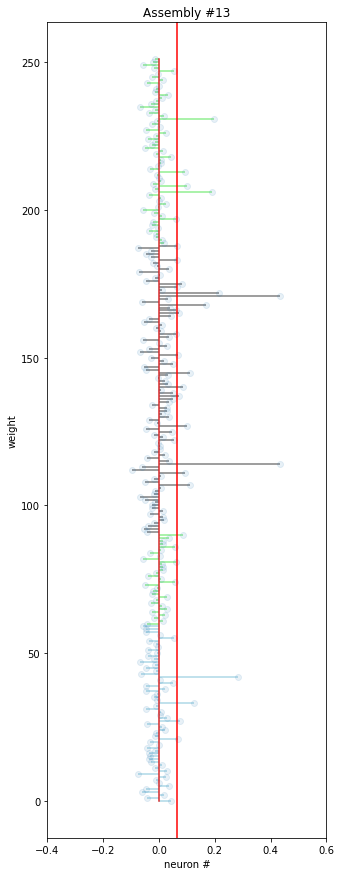

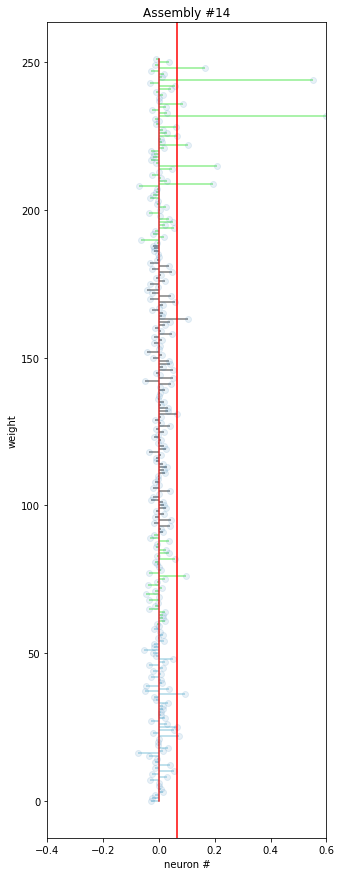

In [69]:
for (pi,pattern) in enumerate(patterns[0:15]):
    plt.figure(figsize=(5,15))
    threshold = 1/np.sqrt(len(neurons))

    markerline, stemlines, baseline = plt.stem(pattern,orientation='horizontal')
    stemlines.set_colors(colors)
    plt.axvline(1/np.sqrt(len(neurons)),color = 'red')
    markercolors = np.where(pattern<threshold,'red','blue')



    markerline.set_alpha(0.1)

    plt.xlim(-0.4,0.6)
    plt.xlabel('neuron #')
    plt.ylabel('weight')
    plt.title(f'Assembly #{pi}')
    plt.savefig(f'/home/billel/pCloudDrive/IFM/work/Figures_Gabrielle/Assemblies/cross{pi}.svg')


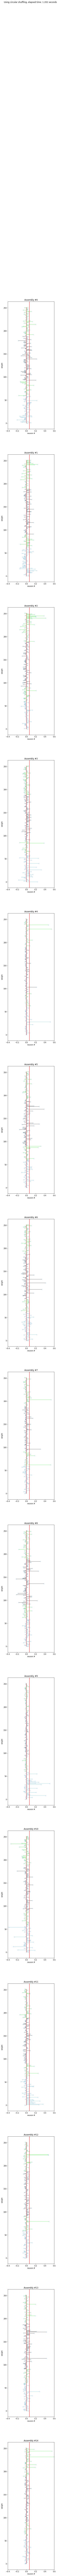

In [64]:
plt.figure(figsize=(5,50*5))
for (pi,pattern) in enumerate(patterns[0:15]):
        threshold = 1/np.sqrt(len(neurons))

        plt.subplot(len(patterns[0:15]),1,1+pi)
        markerline, stemlines, baseline = plt.stem(pattern,orientation='horizontal')
        stemlines.set_colors(colors)
        plt.axvline(1/np.sqrt(len(neurons)),color = 'red')
        markercolors = np.where(pattern<threshold,'red','blue')



        markerline.set_alpha(0.1)

        plt.xlim(-0.4,0.6)
        plt.xlabel('neuron #')
        plt.ylabel('weight')
        plt.title(f'Assembly #{pi}')
plt.suptitle('Using circular shuffling, elapsed time: '+str(tf)+' seconds')
plt.savefig('/home/billel/pCloudDrive/IFM/work/Figures_Gabrielle/Assemblies/cross.svg')


In [123]:
a = plt.stem(pattern,use_line_collection = True)
stemlines.set_colors(colors)

ValueError: Unrecognized marker style 'None'

<Figure size 432x288 with 0 Axes>

In [83]:
for l in stemlines: l

In [57]:
import scipy
actmat,b = binSpikes(neurons['BLA'],binSize=0.01)
zactmat = scipy.stats.zscore(actmat,1)
assemblyAct = assembly.computeAssemblyActivity(patterns,zactmat)

for i,pattern in enumerate(patterns):
    members = np.where(np.abs(pattern)>0.15)
    print(members)
    peak_ = np.argmax(assemblyAct[i])
    prange = peak_ + np.array([-1000,1000])
    smps2plot = np.arange(prange[0],prange[1])
    plt.figure()
    bk.plot.rasterPlot(neurons['BLA'],np.array([prange*0.01]),col = 'black')
    bk.plot.rasterPlot(neurons['BLA'][members],np.array([prange*0.01]),col = 'red')
    plt.plot(smps2plot*0.01,assemblyAct[i][smps2plot]/20)
    plt.grid()
    plt.show()

NameError: name 'binSpikes' is not defined

In [ ]:
plt.figure(figsize=(15,6))
s1 = plt.subplot(211)
plt.imshow(act_bla[:,0:150000],cmap='Reds',interpolation='nearest',aspect='auto')
plt.title('z-scored activity matrix')
plt.ylabel('neuron #')

plt.subplot(212,sharex=s1)
plt.plot(assemblyAct[:,0:150000].T,linewidth=1)
plt.title('assembly activities')
plt.xlim(0,14999)
plt.xlabel('time bin')
plt.ylabel('strength')
plt.tight_layout()
plt.show()

NameError: name 'assemblyAct' is not defined

In [9]:
### Track Assemblie and test for orthogonality 

In [3]:
import bk.load
import numpy as np
import bk.compute

import basefunction.assembly

import neuroseries as nts

import scipy
import matplotlib.pyplot as plt
from tqdm import tqdm

In [43]:
def angles_vectors(a,b):
    dot = np.dot(a,b)
    norms = np.linalg.norm(a)*np.linalg.norm(b)

    cos = dot/norms
    rad = np.arccos(cos)
    deg = np.rad2deg(rad)

    return deg

In [32]:
bk.load.current_session_linux()
neurons, metadata = bk.load.spikes()
states = bk.load.states()

neurons_hpc = neurons[metadata.Region == 'Hpc']

t, actmat = bk.compute.binSpikes(neurons_hpc)
actmat = nts.TsdFrame(t,actmat.T,time_units='s')

run = bk.load.run_intervals()
actmat_run = actmat.restrict(run)
actmat_sws = actmat.restrict(states['sws'])

Rat : 8 on day : 6
Working with session Rat08-20130713 @ /home/billel/Data/GG-Dataset/Rat08/Rat08-20130713
Data already saved in Numpy format, loading them from here:
Rat08-20130713-neurons.npy
Rat08-20130713-metadata.npy


100%|██████████| 1000/1000 [00:33<00:00, 30.01it/s]


In [34]:
pattern,sig,zact = basefunction.assembly.runPatterns(actmat_run.values.T.astype(float),method = 'ica',nullhyp = 'circ')

zact_sws = scipy.stats.zscore(actmat_sws.values,0)
assemblies_activities = basefunction.assembly.computeAssemblyActivity(pattern,zact_sws.T)

In [71]:
a = np.copy(assemblies_activities[0])
b = np.copy(assemblies_activities[1])

dot = angles_vectors(a,b)

l = []
for i in tqdm(range(1000)):
    np.random.shuffle(a)
    np.random.shuffle(b)
    l.append(angles_vectors(a,b))
plt.figure()
plt.hist(l,100)
plt.axvline(dot,color = 'red')

 55%|█████▍    | 545/1000 [00:06<00:05, 82.25it/s]


KeyboardInterrupt: 

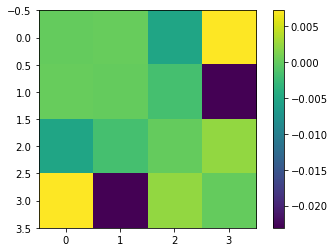

In [35]:
corr = np.corrcoef(assemblies_activities)
corr[np.diag_indices_from(corr)] = 0
plt.imshow(corr)
plt.colorbar()
plt.show()

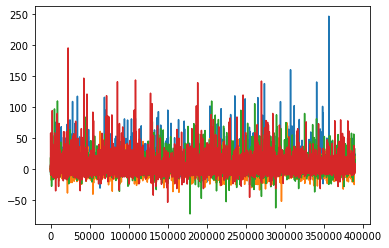

In [39]:
plt.plot(assemblies_activities.T)

In [44]:
angles_vectors(assemblies_activities[0],assemblies_activities[1])

89.91999965475273